<center>
Obrada prirodnog jezika

Lemmatization

Lucija Dumančić


# DATA PREPARATION & EDA

### Libraries

In [1]:
import xml.etree.ElementTree as ET
import numpy as np
import pandas as pd
import re
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import spacy
import random



1. **xml.etree.ElementTree**: This library allows us to parse and manipulate XML documents in Python. It provides a simple and efficient way to navigate and edit XML data.
2. **numpy**: NumPy is a powerful library for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently.
3. **pandas**: Pandas is a data manipulation and analysis library for Python. It provides data structures like DataFrame and Series, which are highly efficient for working with structured data. Pandas is widely used for tasks such as data cleaning, manipulation, and analysis.
4. **re**: The "re" module is Python's built-in regular expression library. Regular expressions are powerful tools for pattern matching and text manipulation. The "re" module provides functions and methods for searching, replacing, and manipulating text using regular expressions. It's commonly used for tasks like text preprocessing, pattern matching, and data extraction.
5. **tqdm**: tqdm is a library for adding progress bars to Python code. It's particulary useful when iterating over large datasets or performing time-consuming operations, as it provides a visual indication of progress.
6. **sklearn.model_selection.train_test_split**: This module from scikit-learn provides functions for splitting datasets into train and test sets. It's commonly used for evaluating the performance of machine learning models by splitting the data into training and testing subsets.
7. **matplotlib.pyplot**: Matplotlib is a plotting library for Python, and pyplot is a module within Matplotlib that provides a MATLAB-like interface for creating plots and visualizations. It allows us to create various types of plots, such as line plots, scatter plots, bar plots, histograms, and more.
8. **collections.Counter**: The Counter class is part of the collections module in Python. It provides a convenient way to count the occurrences of elements in a collection (e.g., a list, tuple, or string). Counters are especially handy for tasks like counting word frequencies, generating histograms, and finding most common elements in a collection.
9. **wordcloud.WordCloud**: WordCloud is a library for creating word clouds from text data. A word cloud is a visualization technique that displays words from a text corpus, where the size of each word indicates its frequency or importance. Word clouds are often used to visualize the most common words in a text document or to highlight keywords.
10. **spacy**: spaCy is a natural language processing library for Python. It provides tools and pre-trained models for various NLP tasks such as tokenization and lemmatization, text similarity, text classification, and more.



### Dataset reading

Changing the directory to the directory where our data is saved.

In [2]:
%cd /content/drive/MyDrive/OPJ/Projekt

/content/drive/MyDrive/OPJ/Projekt


The Croatian Web Corpus (hrWaC) is a collection of text data from Croatian websites, collected in 2011 and 2014. It underwent preprocessing steps like near-deduplication, diacritic restoration, morphosyntactic annotation, and lemmatization. The corpus is shuffled by paragraphs and contains metadata for each paragraph, including URL, domain, and language identification. The data was scraped from 14,396 website URLs and comprises 1 397 757 548 tokens. The data is split into 14 XML files with batches of 100 million tokens.

Our dataset is "hrWaC2.1.01.xml" with size of 2.52 GB.

Due to the large size of the data set, we read it in 4 MB chunks. We append each read piece of the file to a string that will eventually contain the content of the entire XML file.

In [ ]:
xml_data_string = ""  # Initialize an empty string to store XML data.

with open('hrWaC2.1.01.xml', 'r') as file:  # Open the XML file in read mode.
    total_mbs_read = 0  # Initialize a variable to track total megabytes read.
    while True:  # Start an infinite loop to read the file in chunks.
        chunk = file.read(4194304)  # Read a chunk of data (4 MB in size).
        bytes_read = len(chunk)  # Get the number of bytes read in the chunk.
        total_mbs_read += bytes_read / (1048576)  # Convert bytes read to megabytes and update the total.
        print("Total megabytes read so far: {:.2f} MB".format(total_mbs_read))  # Print the total megabytes read.

        if not chunk:  # If no more data is read (end of file), break the loop.
            break
        xml_data_string += chunk  # Append the chunk to the XML data string.

Total megabytes read so far: 4.00 MB
Total megabytes read so far: 8.00 MB
Total megabytes read so far: 12.00 MB
Total megabytes read so far: 16.00 MB
Total megabytes read so far: 20.00 MB
Total megabytes read so far: 24.00 MB
Total megabytes read so far: 28.00 MB
Total megabytes read so far: 32.00 MB
Total megabytes read so far: 36.00 MB
Total megabytes read so far: 40.00 MB
Total megabytes read so far: 44.00 MB
Total megabytes read so far: 48.00 MB
Total megabytes read so far: 52.00 MB
Total megabytes read so far: 56.00 MB
Total megabytes read so far: 60.00 MB
Total megabytes read so far: 64.00 MB
Total megabytes read so far: 68.00 MB
Total megabytes read so far: 72.00 MB
Total megabytes read so far: 76.00 MB
Total megabytes read so far: 80.00 MB
Total megabytes read so far: 84.00 MB
Total megabytes read so far: 88.00 MB
Total megabytes read so far: 92.00 MB
Total megabytes read so far: 96.00 MB
Total megabytes read so far: 100.00 MB
Total megabytes read so far: 104.00 MB
Total megaby

Print the first 1000 characters of that string to see the data structure:

In [ ]:
print(xml_data_string[0:1000])

<corpus id="hrWaC2.1.01" lang="hr" n="1">
<p urldomain="autoportal.hr" url="http://www.autoportal.hr/index.php/testc/6560" lang="hr" langdistr="hr:-0.487|sr:-0.513">
<s>
Adam	Adam	Adam	Npmsn
se	se	sebe	Px--sa
otpočetka	otpočetka	otpočetka	Rgp
nudi	nudi	nuditi	Vmr3s
s	s	sa	Si
tri	tri	tri	Mlc
benzinska	benzinska	benzinski	Agpmsgn
motora	motora	motor	Ncmsg
<g/>
:	:	:	Z
1.2	1.2	1.2	Mdc
70	70	70	Mdc
KS	KS	ks	Y
<g/>
,	,	,	Z
1.4	1.4	1.4	Mdc
87	87	87	Mdc
KS	KS	ks	Y
i	i	i	Cc
1.4	1.4	1.4	Mdc
100	100	100	Mdc
KS	KS	ks	Y
<g/>
.	.	.	Z
</s>
<s>
Svi	Svi	sav	Agpmpny
motori	motori	motor	Ncmpn
dolaze	dolaze	dolaziti	Vmr3p
u	u	u	Sl
kombinaciji	kombinaciji	kombinacija	Ncfsl
s	s	sa	Si
ručnim	ručnim	ručni	Agpmsiy
mjenjačem	mjenjačem	mjenjač	Ncmsi
s	s	sa	Si
pet	pet	pet	Mlc
stupnjeva	stupnjeva	stupanj	Ncmpg
prijenosa	prijenosa	prijenos	Ncmsg
<g/>
.	.	.	Z
</s>
<s>
Dizelski	Dizelski	dizelski	Agpmsny
motor	motor	motor	Ncmsn
nije	nije	biti	Var3s
uopće	uopće	uopće	Rgp
u	u	u	Sl
planu	planu	plan	Ncmsl
<g/>
,	,	,	Z
je

In [ ]:
print("The length of the XML data:",len(xml_data_string))

The length of the XML data: 2659381424


The dataset consists of three types of tags: `<p>`, `<s>`, and `<g>`. `<p>` tags represent paragraphs, where each paragraph has corresponding sentences which are tagged with `<s>` element. Each sentence token is formatted in three columns: scrapped form, original form and lemma form. `<g>` tags are present to mark non-word tokens within the sentence, such as punctuation. Main tag is `<corpus>` which represents information about the name of the data set, i.e. its id, language and serial number of the data set from the previously mentioned 14 XML files.

In [ ]:
p_occurrences = xml_data_string.count('</p>')
s_occurrences = xml_data_string.count('</s>')
g_occurrences = xml_data_string.count('<g/>')

print("Number of occurrences of '</p>':", p_occurrences)
print("Number of occurrences of '</s>':", s_occurrences)
print("Number of occurrences of '</g>':", g_occurrences)

Number of occurrences of '</p>': 1950424
Number of occurrences of '</s>': 4721347
Number of occurrences of '</g>': 11013082


In [ ]:
file_path = 'hrWaC2.1.01.xml'

We initialize three arrays for sentences, tokens, and lemmas.

In [ ]:
sentences=[]
tokens=[]
lemmas=[]

In [ ]:
def process_elements(element):
    words_array = []  # Initialize an empty array to store words.
    tokens_array = []  # Initialize an empty array to store tokens.
    lemmas_array = []  # Initialize an empty array to store lemmas.

    for token in element.text.strip().split('\n'):  # Loop through each token in the element's text.
        token_parts = token.split('\t')  # Split the token into its parts using tab as separator.
        words_array.append(token_parts[0])  # Add the word to the words array.
        tokens_array.append(token_parts[1])  # Add the token to the tokens array.
        lemmas_array.append(token_parts[2])  # Add the lemma to the lemmas array.

    sentences.append(words_array)  # Append the words array to the global array of sentences.
    tokens.append(tokens_array)  # Append the tokens array to the global array of tokens.
    lemmas.append(lemmas_array)  # Append the lemmas array to the global array of lemmas.

In [ ]:
for event, element in ET.iterparse(file_path, events=('start', 'end')):  # Iterate over XML events for start and end elements.
    if event == 'end' and element.tag == 's':  # Check if the event is the end of an 's' element.
        process_elements(element)  # Call the function to process the 's' element.
        element.clear()  # Clear the processed 's' element from memory to release resources.

We processed every token form of each sentence in dataset and saved it to corresponding array.

In [ ]:
sentences_chunk = sentences[0:20000]
tokens_chunk = tokens[0:20000]

In [ ]:
different_sentences = []
different_tokens = []

In [ ]:
for i in range(len(sentences_chunk)):  # Iterate over the indices of sentences_chunk.
  # Check if the arrays of sentences and tokens at index i are not the same.
  if not np.array_equal(sentences_chunk[i], tokens_chunk[i]):
    different_sentences.append(sentences_chunk[i])  # Append the different sentence to the array.
    different_tokens.append(tokens_chunk[i])  # Append the corresponding token array to the array.

In [ ]:
print("The number of different sentences:", len(different_sentences))

The number of different sentences: 169


In [ ]:
different_sentences[18]

['Pitala', 'sam', 'ju', 'da', 'li', 'mi', 'taj', 'zub', 'moze', 'puci']

In [ ]:
different_tokens[18]

['Pitala', 'sam', 'ju', 'da', 'li', 'mi', 'taj', 'zub', 'može', 'pući']

In this example, we can see that the scraped form of the token is different from the original form of the token. The scraped form of the token has no diacritical marks of the Croatian language.

In [ ]:
full_sentences = [' '.join(sentence) for sentence in tokens]  # Join each array of tokens into a single string with spaces between tokens.

For this reason, we discard the scraped form of the token, i.e. the first column of the data set. We create sentences by combining the original forms of tokens.

In [ ]:
# Create a DataFrame using pandas, with columns named 'Sentence', 'Tokens', and 'Lemmas'.
data = pd.DataFrame({'Sentence': full_sentences, 'Tokens': tokens, 'Lemmas': lemmas})

In [ ]:
data.head()

,Sentence,Tokens,Lemmas
0,Adam se otpočetka nudi s tri benzinska motora,"[Adam, se, otpočetka, nudi, s, tri, benzinska,...","[Adam, sebe, otpočetka, nuditi, sa, tri, benzi..."
1,Svi motori dolaze u kombinaciji s ručnim mjenj...,"[Svi, motori, dolaze, u, kombinaciji, s, ručni...","[sav, motor, dolaziti, u, kombinacija, sa, ruč..."
2,Dizelski motor nije uopće u planu,"[Dizelski, motor, nije, uopće, u, planu]","[dizelski, motor, biti, uopće, u, plan]"
3,U kombiniranom načinu vožnje Adam 1.2 ecoFLEX ...,"[U, kombiniranom, načinu, vožnje, Adam, 1.2, e...","[u, kombiniran, način, vožnja, Adam, 1.2, ecoF..."
4,"Oba modela 1.4 ecoFLEX troše samo 5,1 l / 100 ...","[Oba, modela, 1.4, ecoFLEX, troše, samo, 5,1, ...","[oba, model, 1.4, ecoFLEX, trošiti, samo, 5,1,..."


We create our dataframe with 3 columns. The first column is "Sentence" which is a combination of the original token forms, the second column is "Tokens" which contains the original token forms and the last column is "Lemmas" which contains the lemmatized form of each token.

In [ ]:
data.to_csv('hrWaC2.1.01.csv', index=False)  # Write the DataFrame to a CSV file without including the index.
print("CSV file has been saved.")  # Print a message indicating that the CSV file has been successfully saved.

CSV file has been saved.


We saved the dataframe as a CSV file for easier further work.

### Dataset saved to CSV

In [3]:
dataset = pd.read_csv("hrWaC2.1.01.csv",  # Read the CSV file named "hrWaC2.1.01.csv" into a pandas DataFrame.
                      converters={"Tokens": eval, "Lemmas": eval})  # Use the eval function to convert columns 'Tokens' and 'Lemmas' to their original type.

In [4]:
dataset.head()

,Sentence,Tokens,Lemmas
0,Adam se otpočetka nudi s tri benzinska motora,"[Adam, se, otpočetka, nudi, s, tri, benzinska,...","[Adam, sebe, otpočetka, nuditi, sa, tri, benzi..."
1,Svi motori dolaze u kombinaciji s ručnim mjenj...,"[Svi, motori, dolaze, u, kombinaciji, s, ručni...","[sav, motor, dolaziti, u, kombinacija, sa, ruč..."
2,Dizelski motor nije uopće u planu,"[Dizelski, motor, nije, uopće, u, planu]","[dizelski, motor, biti, uopće, u, plan]"
3,U kombiniranom načinu vožnje Adam 1.2 ecoFLEX ...,"[U, kombiniranom, načinu, vožnje, Adam, 1.2, e...","[u, kombiniran, način, vožnja, Adam, 1.2, ecoF..."
4,"Oba modela 1.4 ecoFLEX troše samo 5,1 l / 100 ...","[Oba, modela, 1.4, ecoFLEX, troše, samo, 5,1, ...","[oba, model, 1.4, ecoFLEX, trošiti, samo, 5,1,..."


### Preprocessing data

In [5]:
dataset.shape

(4721347, 3)

In [6]:
dataset.duplicated(subset='Sentence').sum()  # Check for duplicate rows based on the 'Sentence' column and return a boolean Series indicating duplicates.
                                            # Sum up the number of True values in the boolean Series, representing the count of duplicate rows.

716660

Check for duplicate sentences

In [7]:
dataset.drop_duplicates(subset='Sentence',
                         keep='first',
                         inplace=True)  # Modify the DataFrame in place (without creating a new one).

Remove duplicate rows based on the 'Sentence' column and keep the first occurrence of each duplicated row.

In [8]:
dataset.duplicated(subset='Sentence').sum()

0

In [9]:
dataset.shape

(4004687, 3)

We now see that our data is cleaned. Duplicate sentences are droped.

In [10]:
br = 0  # Initialize a counter for the number of sentences where the number of tokens does not match the number of lemmas.

for tokens, lemmas in zip(dataset['Tokens'], dataset['Lemmas']):  # Iterate over corresponding arrays of tokens and lemmas in the DataFrame.
  if len(tokens) != len(lemmas):  # Check if the lengths of tokens and lemmas are different.
    br += 1  # Increment the counter for mismatched lengths.

print("Number of sentences with mismatched token and lemma lengts:", br)

Number of sentences with mismatched token and lemma lengts: 0


We compared the length of each token array and each lemma array to verify the data set.

In [11]:
def process_column(column):
  regex_pattern = re.compile(r'[^\w\s]|[\d_]')  # Compile a regex pattern to match non-alphanumeric characters and digits.
  cleaned_column = [re.sub(regex_pattern, "", word).lower() for sentence in column for word in sentence]  # Clean each word in each sentence in the column by removing non-alphanumeric characters, converting to lowercase.
  return cleaned_column  # Return the cleaned column.

In [12]:
tokens_array = process_column(dataset['Tokens'])  # Process the 'Tokens' column of the dataset to remove non-alphanumeric characters and convert words to lowercase.
lemmas_array = process_column(dataset['Lemmas'])  # Process the 'Lemmas' column of the dataset to remove non-alphanumeric characters and convert words to lowercase.

We now have two arrays of preprocessed tokens and lemmas.

In [13]:
print("The length of array with tokens:", len(tokens_array))
print("The length of array with lemmas:", len(lemmas_array))

The length of array with tokens: 40593565
The length of array with lemmas: 40593565


In [14]:
print("The first 10 elements of the array with tokens:", tokens_array[:10])
print("The first 10 elements of the array with lemmas:", lemmas_array[:10])

The first 10 elements of the array with tokens: ['adam', 'se', 'otpočetka', 'nudi', 's', 'tri', 'benzinska', 'motora', 'svi', 'motori']
The first 10 elements of the array with lemmas: ['adam', 'sebe', 'otpočetka', 'nuditi', 'sa', 'tri', 'benzinski', 'motor', 'sav', 'motor']


In [15]:
# Initialize an empty dictionary to store token-lemma mappings and another for lemma frequencies.
token_lemma_dict = {}
lemma_frequency_dict = {}

# Create a tqdm progress bar to track the processing progress.
with tqdm(total=len(tokens_array)) as pbar:
  # Iterate through corresponding token-lemma pairs.
  for token, lemma in zip(tokens_array, lemmas_array):
      if token not in token_lemma_dict:
        # If token is not already in the dictionary, add it with its lemma and set count to 1.
        token_lemma_dict[token] = {'lemma': lemma, 'count': 1} # Creating a list to store multiple lemmas if necessary
      elif token in token_lemma_dict:
        # If the token already exists, increment its count.
        token_lemma_dict[token]['count'] += 1
      # Check if the lemma is already in the dictionary.
      if lemma not in lemma_frequency_dict:
        # If not, add the lemma with a count of 1.
        lemma_frequency_dict[lemma] = 1
      elif lemma in lemma_frequency_dict:
        # If lemma already exists, increment its count.
        lemma_frequency_dict[lemma] += 1
      # Update the progress bar to indicate processing progress.
      pbar.update(1)

100%|██████████| 40593565/40593565 [01:19<00:00, 511561.24it/s]


We have created a dictionary in which the key is a token and the value is its lemma and the number of occurrences in the corpus. That way we have all unique tokens. In the second dictionary, we set the lemma as the key, and the value is its number of occurrences. These dictionaries are very useful for us later in descriptive statistics.

In [16]:
token_lemma_dict.pop("")  # Remove the empty string key from token_lemma_dict.

{'lemma': '', 'count': 1471833}

In [17]:
lemma_frequency_dict.pop("")  # Remove the empty string key from lemma_frequency_dict.

1471826

In [18]:
print("The length of token_lemma dictionary:", len(token_lemma_dict))
print("The length of lemma_frequency dictionary:", len(lemma_frequency_dict))

The length of token_lemma dictionary: 864938
The length of lemma_frequency dictionary: 537479


In [19]:
print("The first 10 items in the token_lemma dictionary:\n")

for i, (token, data) in enumerate(token_lemma_dict.items()):  # Iterate over the first 10 items in the token_lemma_dict.
    if i >= 10:  # Exit the loop when 10 items have been processed.
        break
    print(f"{token}: {data['lemma']}, {data['count']}")  # Print the token, its corresponding lemma, and its count.

The first 10 items in the token_lemma dictionary:

adam: adam, 385
se: sebe, 745695
otpočetka: otpočetka, 86
nudi: nuditi, 4774
s: sa, 235740
tri: tri, 26432
benzinska: benzinski, 112
motora: motor, 2061
svi: sav, 34803
motori: motor, 381


In [20]:
sorted_token_lemma_dict = sorted(token_lemma_dict.items(), key=lambda x: x[1]['count'], reverse=True)
# Sort the token_lemma_dict based on the count of each token-lemma pair in descending order.

sorted_token_lemma_dict = {item[0]: item[1] for item in sorted_token_lemma_dict}
# Convert the sorted list of tuples back to a dictionary, preserving the order.

In [21]:
print("The first 10 items in sorted token_lemma dictionary:\n")

for i, (token, data) in enumerate(sorted_token_lemma_dict.items()):  # Iterate over the first 10 items in the sorted_token_lemma_dict.
    if i >= 10:  # Exit the loop when 10 items have been processed.
        break
    print(f"{token}: {data['lemma']}, {data['count']}")  # Print the token, its corresponding lemma, and its count.

The first 10 items in sorted token_lemma dictionary:

je: biti, 1348528
i: i, 1327411
u: u, 1261534
se: sebe, 745695
na: na, 672314
da: da, 574342
za: za, 478065
su: biti, 435947
od: od, 294414
s: sa, 235740


In [22]:
print("The first 10 items in the lemma_frequency dictionary:\n")

for i, (lemma, frequency) in enumerate(lemma_frequency_dict.items()):  # Iterate over the first 10 items in the lemma_frequency_dict.
    if i >= 10:  # Exit the loop when 10 items have been processed.
        break
    print(f"{lemma}: {frequency}")  # Print the lemma and its corresponding frequency.

The first 10 items in the lemma_frequency dictionary:

adam: 573
sebe: 778940
otpočetka: 86
nuditi: 8530
sa: 336641
tri: 27124
benzinski: 999
motor: 5778
sav: 191108
dolaziti: 17046


In [23]:
sorted_lemma_frequency_dict = sorted(lemma_frequency_dict.items(), key=lambda x: x[1], reverse=True)
# Sort the lemma_frequency_dict based on the frequency of each lemma in descending order.

sorted_lemma_frequency_dict = {item[0]: item[1] for item in sorted_lemma_frequency_dict}
# Convert the sorted list of tuples back to a dictionary, preserving the order.

In [24]:
print("The first 10 items in sorted lemma_frequency dictionary:\n")

for i, (lemma, frequency) in enumerate(sorted_lemma_frequency_dict.items()):  # Iterate over the first 10 items in the sorted_lemma_frequency_dict.
    if i >= 10:  # Exit the loop when 10 items have been processed.
        break
    print(f"{lemma}: {frequency}")  # Print the lemma and its corresponding frequency.

The first 10 items in sorted lemma_frequency dictionary:

biti: 2670032
i: 1327549
u: 1261574
sebe: 778940
na: 672376
da: 573989
koji: 491519
za: 478074
taj: 412382
sa: 336641


In [25]:
lemmas_with_frequency_1 = []

# Iterate through the dictionary
for lemma, frequency in lemma_frequency_dict.items():
    # Check if the frequency is 1
    if frequency == 1:
        # If yes, append the lemma to the array
        lemmas_with_frequency_1.append(lemma)

Create an array of lemmas that appear only once in the dataset.

In [26]:
print("Number of lemmas with frequency 1:", len(lemmas_with_frequency_1))
print("First few lemmas with frequency 1:", lemmas_with_frequency_1[:10])

Number of lemmas with frequency 1: 317014
First few lemmas with frequency 1: ['perdstaviti', 'rafaele', 'umirovljenikaogranak', 'kaisera', 'fendermeg', 'mmfender', 'ružabrcković', 'implemantacija', 'bjondina', 'tolica']


### Processed dataset

In [ ]:
X = tokens_array  # Assign the token array to X.
y = lemmas_array  # Assign the lemma array to y.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We split the data into training and testing datasets with a test size of 20%, using a random state for reproducibility.

In [ ]:
#due to faster iteration
lemmas_with_frequency_1 = set(lemmas_with_frequency_1)

In [ ]:
def unique_dict(x_array, y_array):
  # Initialize an empty dictionary to store unique token-lemma mappings.
  d = {}

  # Create a tqdm progress bar to track processing progress.
  with tqdm(total=len(x_array)) as pbar:
    # Iterate through corresponding token-lemma pairs.
    for token, lemma in zip(x_array, y_array):
      # Check if the token is not already in the dictionary and if the lemma is not in lemmas_with_frequency_1 array.
      if token not in d and lemma not in lemmas_with_frequency_1:
        d[token] = lemma  # If conditions are met, add the token with its lemma to the dictionary.
      pbar.update(1)  # Update the progress bar.
  d.pop("")  # Remove the empty string key if it exists.
  return d  # Return the unique token-lemma dictionary.

This function is made for creating train and test datasets. It selects only those tokens whose lemma appears more than once. This selection ensures that tokens which would otherwise be ineffective for training or prediction are excluded. This is particularly important because, during the data splitting process, such tokens might end up exclusively in either the training or testing dataset, resulting in biased or unreliable model performance.

#### Train dataset

In [ ]:
train_dictionary = unique_dict(X_train, y_train)
# Generate a unique token-lemma dictionary using the training data.

100%|██████████| 32474852/32474852 [00:33<00:00, 960351.39it/s]


In [ ]:
train_dataset = pd.DataFrame({'Token': train_dictionary.keys(), 'Lemma': train_dictionary.values()})
# Create a DataFrame using pandas with columns 'Token' and 'Lemma' from the unique token-lemma dictionary generated from the training data.

In [ ]:
train_dataset.head()

,Token,Lemma
0,rujan,rujan
1,da,da
2,znači,značiti
3,su,biti
4,bio,biti


In [ ]:
train_dataset.shape

(549442, 2)

In [ ]:
train_dataset.to_csv('hrWaC2.1.01_train_dataset.csv', index=False)
# Write the training dataset DataFrame to a CSV file without including the index.

print("CSV file has been saved.")
# Print a message indicating that the CSV file has been successfully saved.

CSV file has been saved.


#### Test dataset

In [ ]:
test_dictionary = unique_dict(X_test, y_test)
# Generate a unique token-lemma dictionary using the testing data.

100%|██████████| 8118713/8118713 [00:08<00:00, 989771.05it/s]


In [ ]:
len(test_dictionary)

320498

Due to the information that there are around 550k unique tokens prepared for training, we will limit the size of unique test tokens to be 10% of the train tokens' size, which is about 55k tokens for prediction.

In [ ]:
test_length = round(0.10 * len(train_dataset))

In [ ]:
test_tokens = list(train_dictionary.keys())[:test_length]
test_lemmas = list(train_dictionary.values())[:test_length]

In [ ]:
test_dataset = pd.DataFrame({'Token': test_tokens, 'Lemma': test_lemmas})
# Create a DataFrame using pandas with columns 'Token' and 'Lemma' from the unique token-lemma dictionary generated from the testing data.

In [ ]:
test_dataset.head()

,Token,Lemma
0,rujan,rujan
1,da,da
2,znači,značiti
3,su,biti
4,bio,biti


In [ ]:
test_dataset.shape

(54944, 2)

In [ ]:
test_dataset.to_csv('hrWaC2.1.01_test_dataset.csv', index=False)
# Write the testing dataset DataFrame to a CSV file without including the index.

print("CSV file has been saved.")
# Print a message indicating that the CSV file has been successfully saved.

CSV file has been saved.


## Descriptive statistics

#### Unique Tokens vs Unique Lemmas

In [27]:
num_unique_tokens = len(token_lemma_dict)  # Get the number of unique tokens by the length of token_lemma dictionary.
num_unique_lemmas = len(lemma_frequency_dict)  # Get the number of unique lemmas by the length of lemma_frequency dictionary.

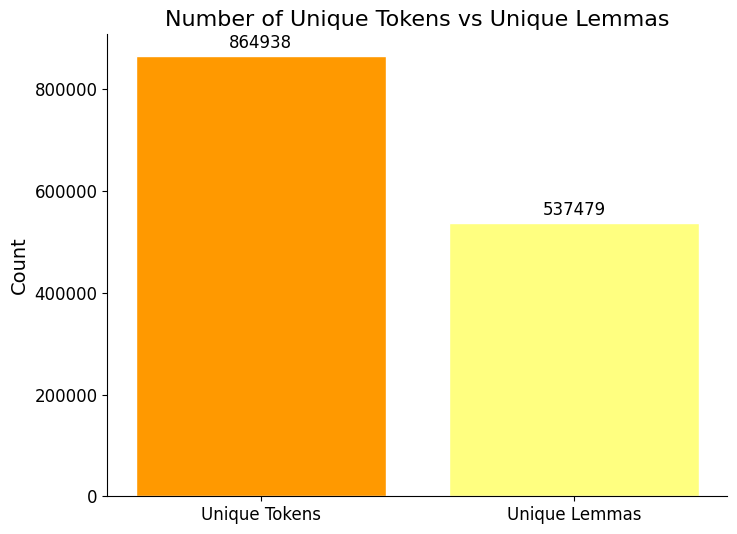

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))  # Create a figure and axis object for the plot with specified size.

bars = ax.bar(['Unique Tokens', 'Unique Lemmas'], [num_unique_tokens, num_unique_lemmas], color=['#ff9900', '#ffff80'], edgecolor='white')
# Create bars representing the counts of unique tokens and unique lemmas with specified colors and edgecolor.

# Add labels to each bar showing the corresponding count.
for bar in bars:
    height = bar.get_height()  # Get the height of the bar.
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),  # Position of the label.
                xytext=(0, 3),  # 3 points vertical offset from the top of the bar.
                textcoords="offset points",  # Offset in points.
                ha='center', va='bottom', fontsize=12)  # Horizontal and vertical alignment of the text.

# Add title and labels to the plot.
plt.title('Number of Unique Tokens vs Unique Lemmas', fontsize=16)  # Set the title of the plot.
plt.ylabel('Count', fontsize=14)  # Label the y-axis.

# Adjust tick parameters for better readability.
ax.tick_params(axis='both', which='major', labelsize=12)  # Set tick parameters for major ticks.
ax.tick_params(axis='both', which='minor', labelsize=10)  # Set tick parameters for minor ticks.

# Remove top and right spines.
ax.spines['top'].set_visible(False)  # Hide the top spine.
ax.spines['right'].set_visible(False)  # Hide the right spine.

plt.show()  # Display the plot.

This visualization displays a comparison between the number of unique tokens and unique lemmas in a dataset using a bar chart.

From the graph, we can see that we have 864938 unique tokens and 537479 unique lemmas, which indicates that one lemma appears in many different tokens.

#### Token-to-Lemma Ratio

Here we calculate the token-to-lemma ratio, which shows the average number of different tokens for each lemma in a dataset. It divides the count of unique tokens by the count of unique lemmas. The result indicates how many tokens, on average, correspond to each lemma.

In [29]:
token_to_lemma_ratio = num_unique_tokens / num_unique_lemmas

print("Token-to-Lemma Ratio:", round(token_to_lemma_ratio, 2))

Token-to-Lemma Ratio: 1.61


On average, there are approximately 1.61 unique tokens for each unique lemma in the dataset.

#### Top 10 Tokens and Lemmas

In [30]:
top_tokens = list(sorted_token_lemma_dict.keys())[:10]
# Get the top 10 tokens from the sorted_token_lemma_dict and convert them to a list.

counts = [sorted_token_lemma_dict[token]['count'] for token in top_tokens]
# Retrieve the counts corresponding to the top 10 tokens from the sorted_token_lemma_dict and store them in a list.

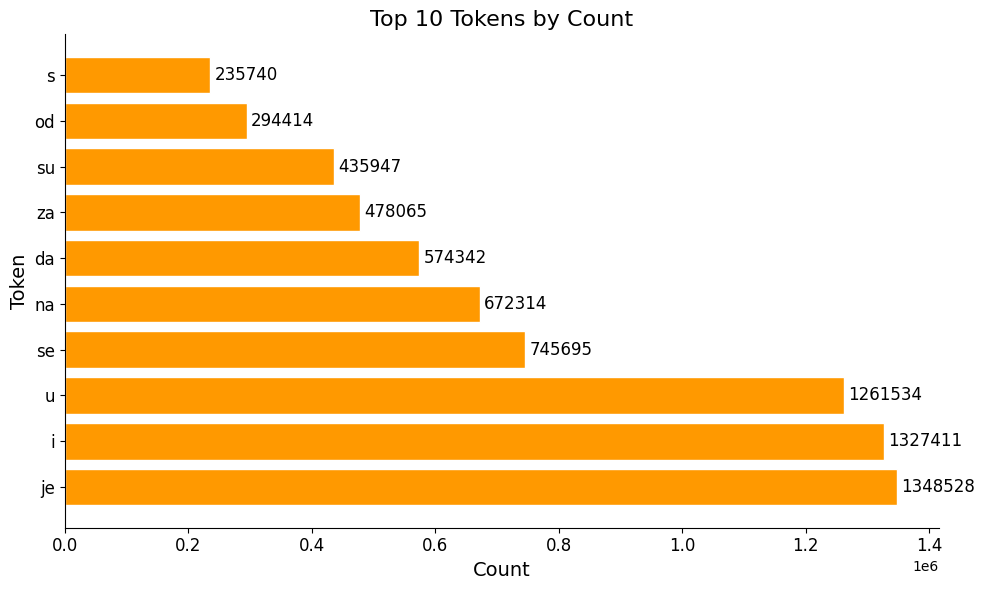

In [31]:
# Plotting the top 10 tokens by count in a horizontal bar chart.
fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and axis object for the plot with specified size.

bars = ax.barh(top_tokens, counts, color='#ff9900', edgecolor='white')  # Create horizontal bars.

# Add labels to each bar showing the corresponding count.
for bar in bars:
    width = bar.get_width()  # Get the width of the bar.
    ax.annotate('{}'.format(width),
                xy=(width, bar.get_y() + bar.get_height() / 2),  # Position of the label.
                xytext=(3, 0),  # 3 points horizontal offset from the end of the bar.
                textcoords="offset points",  # Offset in points.
                ha='left', va='center', fontsize=12)  # Horizontal and vertical alignment of the text.

# Add title and labels to the plot.
plt.title('Top 10 Tokens by Count', fontsize=16)  # Set the title of the plot.
plt.xlabel('Count', fontsize=14)  # Label the x-axis.
plt.ylabel('Token', fontsize=14)  # Label the y-axis.

# Adjust tick parameters for better readability.
ax.tick_params(axis='both', which='major', labelsize=12)  # Set tick parameters for major ticks.

# Remove top and right spines.
ax.spines['top'].set_visible(False)  # Hide the top spine.
ax.spines['right'].set_visible(False)  # Hide the right spine.

plt.tight_layout()  # Adjust layout to prevent overlapping elements.
plt.show()  # Display the plot.

In this diagram, we can see the representation of the first 10 tokens according to their occurrence in the data set and the number of their occurrences. The most frequently occurring token is "je" with 1348528 occurrences.

In [32]:
top_lemmas = list(sorted_lemma_frequency_dict.keys())[:10]
# Get the top 10 lemmas from the sorted_lemma_frequency_dict and convert them to a list.

frequencies = list(sorted_lemma_frequency_dict.values())[:10]
# Get the frequencies corresponding to the top 10 lemmas from the sorted_lemma_frequency_dict and convert them to a list.

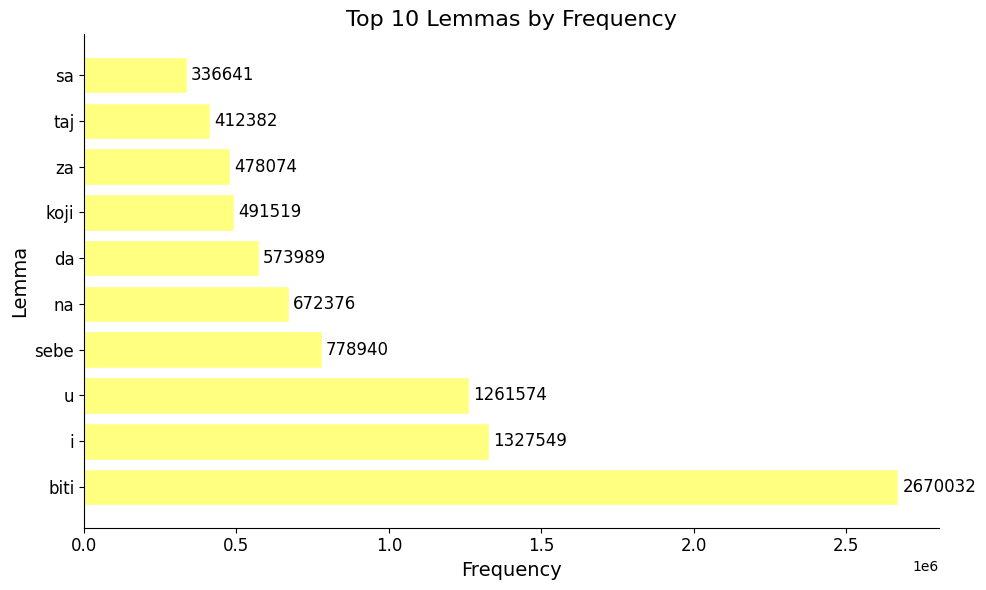

In [33]:
# Plotting the top 10 lemmas by frequency in a horizontal bar chart.
fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and axis object for the plot with specified size.

bars = ax.barh(top_lemmas, frequencies, color='#ffff80', edgecolor='white')  # Create horizontal bars.

# Add labels to each bar showing the corresponding frequency.
for bar in bars:
    width = bar.get_width()  # Get the width of the bar.
    ax.annotate('{}'.format(width),
                xy=(width, bar.get_y() + bar.get_height() / 2),  # Position of the label.
                xytext=(3, 0),  # 3 points horizontal offset from the end of the bar.
                textcoords="offset points",  # Offset in points.
                ha='left', va='center', fontsize=12)  # Horizontal and vertical alignment of the text.

# Add title and labels to the plot.
plt.title('Top 10 Lemmas by Frequency', fontsize=16)  # Set the title of the plot.
plt.xlabel('Frequency', fontsize=14)  # Label the x-axis.
plt.ylabel('Lemma', fontsize=14)  # Label the y-axis.

# Adjust tick parameters for better readability.
ax.tick_params(axis='both', which='major', labelsize=12)  # Set tick parameters for major ticks.

# Remove top and right spines.
ax.spines['top'].set_visible(False)  # Hide the top spine.
ax.spines['right'].set_visible(False)  # Hide the right spine.

plt.tight_layout()  # Adjust layout to prevent overlapping elements.
plt.show()  # Display the plot.

We did the same thing for the lemmas. The top 10 lemmas by number of appearances are visualized. The most frequent lemma is "biti" with 2670032 occurrences.

#### Token and Lemma Length Distribution

In [34]:
longest_token = max(sorted_token_lemma_dict, key=lambda x: len(x))
# Find the token with the maximum length in sorted_token_lemma_dict.

shortest_token = min(sorted_token_lemma_dict, key=lambda x: len(x))
# Find the token with the minimum length in sorted_token_lemma_dict.

longest_count = sorted_token_lemma_dict[longest_token]['count']
# Get the count of occurrences for the longest token.

shortest_count = sorted_token_lemma_dict[shortest_token]['count']
# Get the count of occurrences for the shortest token.

In [35]:
print(f"Longest Token: {longest_token}, Count: {longest_count}")
print(f"Shortest Token: {shortest_token}, Count: {shortest_count}")

Longest Token: httpwwwherakleahrherakleasavjetujeposlovnislucajevituristickazajednicagradamaloglosinjacasestudylosinjotokvitalnostiikvaliteteusluge, Count: 1
Shortest Token: i, Count: 1327411


Here we find the longest and shortest tokens in the dataset based on their character length. We use a lambda function to determine the length of each token, and then find the token with the maximum and minimum length. In addition, we retrieve the sums associated with the longest and shortest tokens from a sorted dictionary containing token-lemma pairs and their corresponding sums.

In [36]:
longest_lemma = max(sorted_lemma_frequency_dict, key=len)
# Find the lemma with the maximum length in sorted_lemma_frequency_dict.

shortest_lemma = min(sorted_lemma_frequency_dict, key=len)
# Find the lemma with the minimum length in sorted_lemma_frequency_dict.

longest_frequency = sorted_lemma_frequency_dict[longest_lemma]
# Get the frequency of occurrences for the longest lemma.

shortest_frequency = sorted_lemma_frequency_dict[shortest_lemma]
# Get the frequency of occurrences for the shortest lemma.

In [37]:
print(f"Longest Lemma: {longest_lemma}, Frequency: {longest_frequency}")
print(f"Shortest Lemma: {shortest_lemma}, Frequency: {shortest_frequency}")

Longest Lemma: httpwwwherakleahrherakleasavjetujeposlovnislucajevituristickazajednicagradamaloglosinjacasestudylosinjotokvitalnostiikvaliteteusluge, Frequency: 1
Shortest Lemma: i, Frequency: 1327549


Next, here we find the longest and shortest lemma in the data set based on their character length. We retrieve the lemma with the maximum and minimum length using the max and min functions. Additionally, we retrieve the frequencies associated with the longest and shortest lemma from a sorted dictionary containing the lemmas and their corresponding frequencies.

In [38]:
# Calculate the total length of all tokens and lemmas in their respective dictionaries.
total_token_length = sum(len(token) for token in sorted_token_lemma_dict)
total_lemma_length = sum(len(lemma) for lemma in sorted_lemma_frequency_dict)

# Calculate the total number of tokens and lemmas in their respective dictionaries.
total_tokens = len(sorted_token_lemma_dict)
total_lemmas = len(sorted_lemma_frequency_dict)

# Calculate the average length of tokens and lemmas.
average_token_length = total_token_length / total_tokens
average_lemma_length = total_lemma_length / total_lemmas

# Print the average length of tokens and lemmas with two decimal places.
print(f"Average Token Length: {average_token_length:.2f}")
print(f"Average Lemma Length: {average_lemma_length:.2f}")

Average Token Length: 9.04
Average Lemma Length: 8.62


Here we calculated the average length of tokens and lemmas.

In [39]:
token_lengths = [len(token) for token in sorted_token_lemma_dict]
# Create a list containing the lengths of all tokens in sorted_token_lemma_dict.

lemma_lengths = [len(lemma) for lemma in sorted_lemma_frequency_dict]
# Create a list containing the lengths of all lemmas in sorted_lemma_frequency_dict.

<ipython-input-40-d451dfd514f7>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


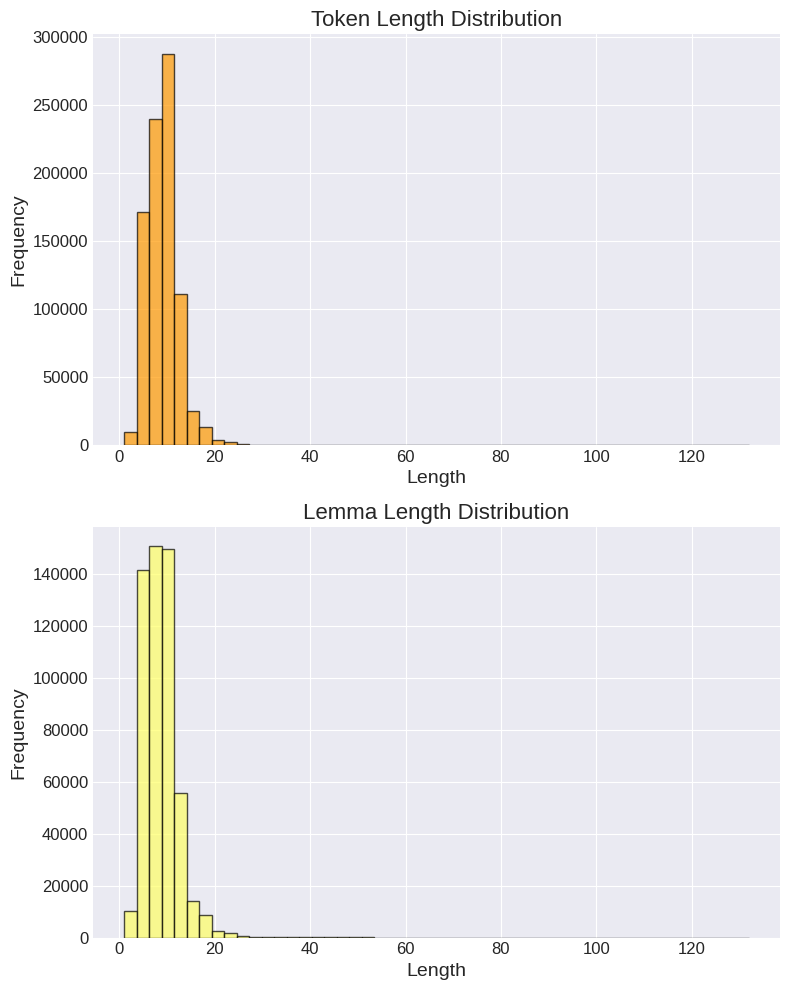

In [40]:
plt.style.use('seaborn-darkgrid')
# Set the style of the plots to 'seaborn-darkgrid'.

fig, axs = plt.subplots(2, 1, figsize=(8, 10))
# Create subplots with 2 rows and 1 column, with a specified size for the figure.

axs[0].hist(token_lengths, bins=50, color='#ff9900', edgecolor='black', alpha=0.7)
# Plot a histogram of token lengths with 50 bins, using specified colors and transparency.
axs[0].set_title('Token Length Distribution', fontsize=16)
# Set the title for the first subplot.
axs[0].set_xlabel('Length', fontsize=14)
# Label the x-axis of the first subplot.
axs[0].set_ylabel('Frequency', fontsize=14)
# Label the y-axis of the first subplot.
axs[0].tick_params(axis='both', which='major', labelsize=12)
# Adjust tick parameters for better readability in the first subplot.

axs[1].hist(lemma_lengths, bins=50, color='#ffff66', edgecolor='black', alpha=0.7)
# Plot a histogram of lemma lengths with 50 bins, using specified colors and transparency.
axs[1].set_title('Lemma Length Distribution', fontsize=16)
# Set the title for the second subplot.
axs[1].set_xlabel('Length', fontsize=14)
# Label the x-axis of the second subplot.
axs[1].set_ylabel('Frequency', fontsize=14)
# Label the y-axis of the second subplot.
axs[1].tick_params(axis='both', which='major', labelsize=12)
# Adjust tick parameters for better readability in the second subplot.

plt.tight_layout()
# Adjust layout to prevent overlapping elements.

plt.show()
# Display the plot.

In these two graphs we can see the distribution of lengths for tokens and lemmas.

The first graph shows the distribution of token lengths and we can see that most tokens are around 10 characters long. After that, most tokens are approximately 3 to 10 characters and 10 to approximately 15 characters. The number of tokens of other lengths is considerably small.

On the second graph, we can see the distribution of lemmas lengths. Most lemmas have a length of 5 to 15 characters.

#### Token and Lemma Count Distribution

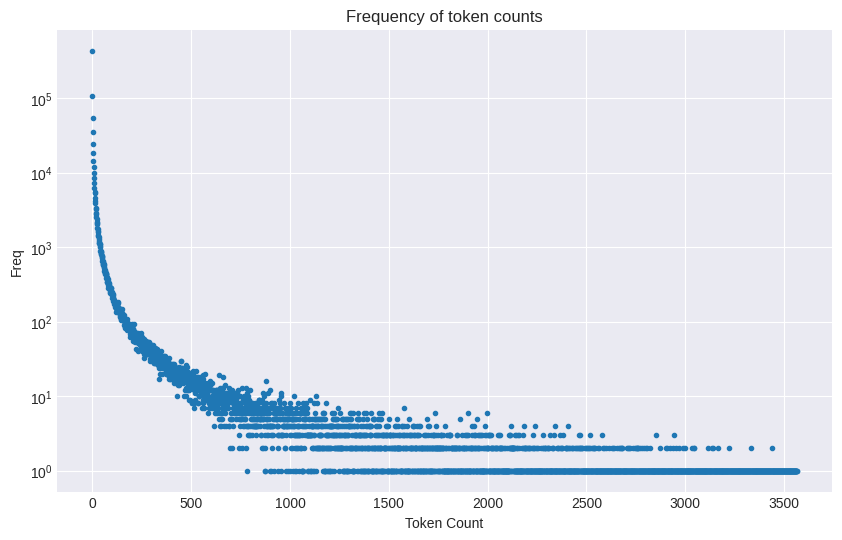

In [41]:
count_frequency = Counter(data['count'] for data in sorted_token_lemma_dict.values())
# Count the frequency of counts (number of occurrences) of tokens in sorted_token_lemma_dict.

freqs = sorted(count_frequency.items())
# Sort the frequencies in ascending order.

counts, frequencies = zip(*freqs)
# Unpack the sorted frequencies into counts and frequencies.

plt.figure(figsize=(10, 6))
# Create a new figure with a specified size.
plt.scatter(range(len(frequencies)), frequencies, marker=".")
# Plot a scatter plot of frequencies against their respective counts.
plt.title("Frequency of token counts")
# Set the title of the plot.
plt.xlabel("Token Count")
# Label the x-axis.
plt.ylabel("Freq")
# Label the y-axis.
plt.yscale("log")
# Set the y-scale to logarithmic for better visualization of the data.

plt.show()
# Display the plot.

This graph shows the frequency of occurrence of tokens using a logarithmic scale.

We can see that very few tokens appear between 10,000 and 100,000 times and most tokens appear between 1 and 100 times. That is, the most common frequency of occurence is between 10<sup>0</sup> and 10<sup>2</sup>, and the least is between 10<sup>4</sup> and 10<sup>6</sup>.

The plot shows a clear exponential decay pattern, suggesting that as the token count increases, the frequency of tokens decreases exponentially.

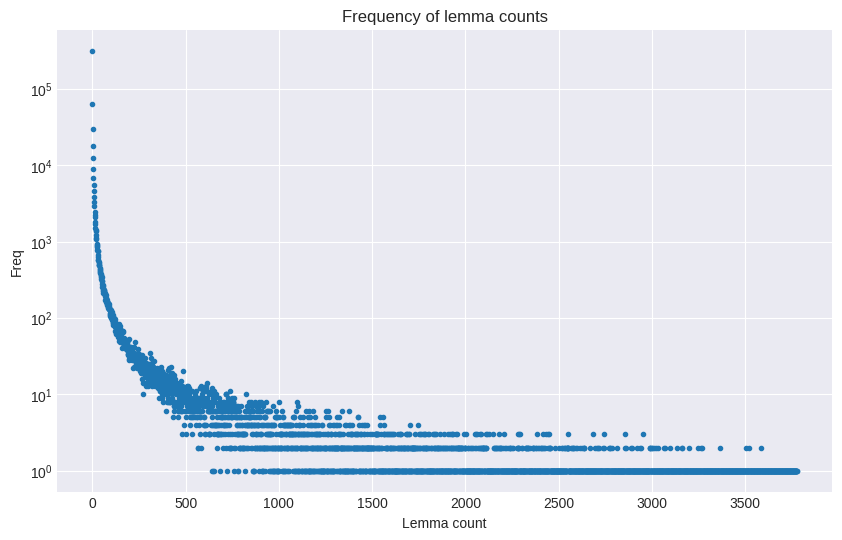

In [57]:
count_frequency = Counter(sorted_lemma_frequency_dict.values())

freqs = sorted(count_frequency.items())
# Sort the lemma-frequency pairs in ascending order based on frequency.

lemmas, frequencies = zip(*freqs)
# Unpack the sorted lemma-frequency pairs into lemmas and frequencies.

plt.figure(figsize=(10, 6))
# Create a new figure with a specified size.
plt.scatter(range(len(frequencies)), frequencies, marker=".")
# Plot a scatter plot of frequencies against their respective lemmas.
plt.title("Frequency of lemma counts")
# Set the title of the plot.
plt.xlabel("Lemma count")
# Label the x-axis.
plt.ylabel("Freq")
# Label the y-axis.
plt.yscale("log")
# Set the y-scale to logarithmic for better visualization of the data.

plt.show()
# Display the plot.

This graph shows the frequency of occurrence of lemmas using a logarithmic scale. Similar to the previous graph depicting token counts, we can observe that very few lemmas appear with high frequencies, while most lemmas appear with lower frequencies. The most common frequency of occurrence is between 10<sup>0</sup> and 10<sup>2</sup>, indicating that the majority of lemmas occur relatively infrequently in the dataset. Conversely, frequencies between 10<sup>4</sup> and 10<sup>6</sup> are rare, suggesting that only a small number of lemmas occur very frequently.

#### Tokens for the most frequent lemma

In [ ]:
# Get the most frequent lemma from the sorted lemma-frequency dictionary.
most_frequent_lemma = list(sorted_lemma_frequency_dict.keys())[0]

# Initialize a list to store tokens associated with the most frequent lemma along with their frequencies.
tokens_for_most_frequent_lemma = []

# Iterate through sorted_token_lemma_dict to find tokens corresponding to the most frequent lemma.
for token, data in sorted_token_lemma_dict.items():
    if data['lemma'] == most_frequent_lemma:
        tokens_for_most_frequent_lemma.append((token, data['count']))

# Print the tokens associated with the most frequent lemma along with their frequencies.
print(f"Tokens for most frequent lemma '{most_frequent_lemma}':")
for token, frequency in tokens_for_most_frequent_lemma:
    print(f"{token}: {frequency}")

Tokens for most frequent lemma 'biti':
je: 1348528
su: 435947
bi: 132495
sam: 126013
nije: 117650
smo: 84467
biti: 79903
bio: 59151
bila: 40558
nisu: 31989
bili: 25573
si: 24158
ste: 21512
bih: 18841
nisam: 17512
bit: 13434
bude: 11141
jest: 8100
bile: 8086
nismo: 7305
bismo: 6044
biste: 4489
jesu: 4069
budu: 3836
niste: 3221
jeste: 3023
nisi: 2747
jesam: 1369
jesi: 1318
budemo: 1121
jesmo: 1111
budem: 964
bijaše: 752
budete: 708
budeš: 421
bijahu: 195
bijah: 78
bije: 42
bješe: 42
biju: 22
bijasmo: 17
bite: 13
biš: 7
bimo: 7
bjehu: 6
bij: 4
bijaste: 4
bijemo: 3
bijući: 3
bito: 3
bijen: 2
bijem: 2
bjesmo: 2
biješ: 2
bidu: 2
bijene: 1
bijeno: 1
bijeni: 1
bjeh: 1
bitim: 1
bijena: 1


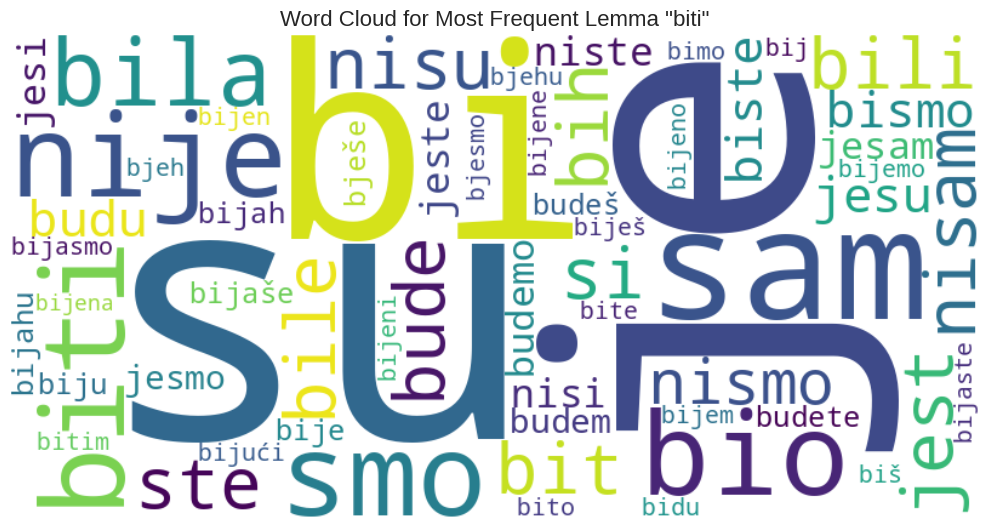

In [ ]:
# Extract only the tokens from the list of tuples
tokens_only = [token for token, _ in tokens_for_most_frequent_lemma]

# Create a word cloud object with specified dimensions, background color, and colormap,
# generated from the tokens associated with the most frequent lemma.
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(' '.join(tokens_only))

# Create a new figure with a specified size.
plt.figure(figsize=(10, 6))
# Display the word cloud as an image with bilinear interpolation.
plt.imshow(wordcloud, interpolation='bilinear')
# Set the title of the plot to indicate it's a word cloud for the most frequent lemma.
plt.title(f'Word Cloud for Most Frequent Lemma "{most_frequent_lemma}"', fontsize=16)
# Hide axis for better presentation.
plt.axis('off')
# Adjust layout to prevent overlapping elements.
plt.tight_layout()

# Show the plot.
plt.show()

This word cloud shows all the tokens that have as their lemma the most common lemma in the data set, i.e. the lemma "biti".

## Vectorization

In [ ]:
!python -m spacy download hr_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 MB 20.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('hr_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Load the pre-trained Croatian language model provided by spaCy,
# which includes word vectors trained on large Croatian corpora.
nlp_hr = spacy.load("hr_core_news_md")

We loaded one of the pre-trained models provided by spaCy specifically for Croatian languange processing. The "hr_core_news_md" model is trained on a large corpus of Croatian text and includes word vectors and linguistic annotations. We used "hr_core_news_md" for vectorizing our tokens and lemmas.

### Train

In [ ]:
train = pd.read_csv('hrWaC2.1.01_train_dataset.csv')

In [ ]:
# Convert the 'Token' column of the 'train' dataset to string type,
# ensuring all values are treated as strings.
train['Token'] = train['Token'].astype(str)

# Convert the 'Lemma' column of the 'train' dataset to string type,
# ensuring all values are treated as strings.
train['Lemma'] = train['Lemma'].astype(str)

In [ ]:
def word_to_vector(data):
    vectorized_tokens = []  # Initialize an empty list to store token vectors.
    vectorized_lemmas = []  # Initialize an empty list to store lemma vectors.

    # Create a tqdm progress bar instance to track the vectorization progress.
    with tqdm(total=len(data), desc="Vectorizing words") as pbar:
        # Iterate over each row of the DataFrame, accessing 'Token' and 'Lemma' columns simultaneously.
        for token, lemma in zip(data['Token'], data['Lemma']):
            # Append the vector representation of the token to the 'vectorized_tokens' list using the loaded Croatian spaCy model.
            vectorized_tokens.append(nlp_hr(token).vector)
            # Append the vector representation of the lemma to the 'vectorized_lemmas' list using the loaded Croatian spaCy model.
            vectorized_lemmas.append(nlp_hr(lemma).vector)
            # Update the progress bar to reflect processing of one word.
            pbar.update(1)

    # Return the lists of token vectors and lemma vectors.
    return vectorized_tokens, vectorized_lemmas

In [ ]:
# Call the 'word_to_vector' function with the 'train' dataset as input, which vectorizes tokens and lemmas in the training dataset.
vectorized_tokens_train, vectorized_lemmas_train = word_to_vector(train)

Vectorizing words: 100%|██████████| 549443/549443 [2:23:34<00:00, 63.78it/s]


In [ ]:
print("The length of vectorized tokens in the training dataset:", len(vectorized_tokens_train))
print("The length of vectorized lemmas in the training dataset:", len(vectorized_lemmas_train))

The length of vectorized tokens in the training dataset: 549443
The length of vectorized lemmas in the training dataset: 549443


In [ ]:
# Save arrays to files
np.save('vectorized_tokens_train.npy', vectorized_tokens_train)
np.save('vectorized_lemmas_train.npy', vectorized_lemmas_train)

###Test

In [ ]:
test = pd.read_csv('hrWaC2.1.01_test_dataset.csv')

In [ ]:
# Convert the 'Token' column of the 'test' dataset to string type,
# ensuring all values are treated as strings.
test['Token'] = test['Token'].astype(str)

# Convert the 'Lemma' column of the 'test' dataset to string type,
# ensuring all values are treated as strings.
test['Lemma'] = test['Lemma'].astype(str)

In [ ]:
# Call the 'word_to_vector' function with the 'test' dataset as input, which vectorizes tokens and lemmas in the testing dataset.
vectorized_tokens_test, vectorized_lemmas_test = word_to_vector(test)

Vectorizing words: 100%|██████████| 54944/54944 [14:27<00:00, 63.30it/s]


In [ ]:
print("The length of vectorized tokens in the testing dataset:", len(vectorized_tokens_test))
print("The length of vectorized lemmas in the testing dataset:", len(vectorized_lemmas_test))

The length of vectorized tokens in the testing dataset: 54944
The length of vectorized lemmas in the testing dataset: 54944


In [ ]:
# Save arrays to files
np.save('vectorized_tokens_test.npy', vectorized_tokens_test)
np.save('vectorized_lemmas_test.npy', vectorized_lemmas_test)